In [1]:
import pandas as pd
import numpy as np
#estandarizacion de variables
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
#graficas
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from pylab import rcParams

#modelo
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
import math
import itertools

In [2]:
df_ = pd.read_excel("PBI.xlsx")
df_

,Unnamed: 0,Consumo privado,Consumo público,Exportaciones FOB (bienes y servicios reales),Formación bruta de capital fijo,Variación de existencias (3),Discrepancia estadística (4),Importaciones FOB (bienes y servicios reales),Producto Interno Bruto
0,1993-01,152148,28507,15396,37325,0,3083,20089,216370
1,1993-04,166026,32816,17483,43956,0,1549,19958,241872
2,1993-07,166668,33440,16427,48221,0,1006,23116,242646
3,1993-10,169860,33048,16058,50776,0,338,24947,245132
4,1994-01,164965,29309,16281,45580,0,3935,27125,232945
...,...,...,...,...,...,...,...,...,...
107,2019-10,450453,99383,172100,110590,12945,-20040,152098,672442
108,2020-01,471875,90957,137243,93562,-20185,-719,141762,630971
109,2020-04,415986,88041,136695,76225,-5772,15272,118578,607869
110,2020-07,408462,90647,136420,115500,2524,-930,137828,614795


In [3]:
df = df_.iloc[45:, :]
df.reset_index(inplace = True, drop=True)

In [4]:
df.rename(columns = {"Unnamed: 0" : "Año/Trimestre"}, inplace=True)
df.columns

C:\Users\leona\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['Año/Trimestre', 'Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo', 'Variación de existencias (3)',
       'Discrepancia estadística (4)',
       'Importaciones FOB (bienes y servicios reales)',
       'Producto Interno Bruto'],
      dtype='object')

In [5]:
df["Año/Trimestre"] =  pd.to_datetime(df["Año/Trimestre"])

<ipython-input-5-b94b48569be0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Año/Trimestre"] =  pd.to_datetime(df["Año/Trimestre"])


In [6]:
eliminados = ["Variación de existencias (3)", "Discrepancia estadística (4)"]
df.drop(eliminados, axis=1, inplace=True)
df

C:\Users\leona\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Año/Trimestre,Consumo privado,Consumo público,Exportaciones FOB (bienes y servicios reales),Formación bruta de capital fijo,Importaciones FOB (bienes y servicios reales),Producto Interno Bruto
0,2004-04-01,338800,52072,119462,81995,80006,514396
1,2004-07-01,310441,53721,119619,79254,85416,481152
2,2004-10-01,293850,60195,120898,75368,88375,484544
3,2005-01-01,319800,54179,119187,80672,84905,493603
4,2005-04-01,385778,58212,138218,94508,97288,581668
...,...,...,...,...,...,...,...
62,2019-10-01,450453,99383,172100,110590,152098,672442
63,2020-01-01,471875,90957,137243,93562,141762,630971
64,2020-04-01,415986,88041,136695,76225,118578,607869
65,2020-07-01,408462,90647,136420,115500,137828,614795


In [7]:
scaler = StandardScaler()
df1= scaler.fit_transform(df.drop("Año/Trimestre", axis=1))
df_std = pd.DataFrame(df1, columns = ['Consumo privado', 'Consumo público',
       'Exportaciones FOB (bienes y servicios reales)',
       'Formación bruta de capital fijo',
       'Importaciones FOB (bienes y servicios reales)',
       'Producto Interno Bruto'])
df_std

,Consumo privado,Consumo público,Exportaciones FOB (bienes y servicios reales),Formación bruta de capital fijo,Importaciones FOB (bienes y servicios reales),Producto Interno Bruto
0,-1.704742,-2.010411,-1.635699,-1.904875,-1.941581,-1.937947
1,-2.101317,-1.898569,-1.625333,-2.023825,-1.804860,-2.384342
2,-2.333326,-1.459473,-1.540883,-2.192465,-1.730080,-2.338795
3,-1.970440,-1.867505,-1.653857,-1.962289,-1.817774,-2.217152
4,-1.047799,-1.593969,-0.397272,-1.361852,-1.504830,-1.034631
...,...,...,...,...,...,...
62,-0.143379,1.198435,1.839900,-0.663946,-0.119668,0.184265
63,0.156188,0.626946,-0.461649,-1.402905,-0.380880,-0.372600
64,-0.625368,0.429169,-0.497833,-2.155274,-0.966788,-0.682809
65,-0.730584,0.605920,-0.515991,-0.450868,-0.480301,-0.589808


In [8]:
df_std.insert(0, "Año/Trimestre", df["Año/Trimestre"].values, allow_duplicates = False)
df_std

,Año/Trimestre,Consumo privado,Consumo público,Exportaciones FOB (bienes y servicios reales),Formación bruta de capital fijo,Importaciones FOB (bienes y servicios reales),Producto Interno Bruto
0,2004-04-01,-1.704742,-2.010411,-1.635699,-1.904875,-1.941581,-1.937947
1,2004-07-01,-2.101317,-1.898569,-1.625333,-2.023825,-1.804860,-2.384342
2,2004-10-01,-2.333326,-1.459473,-1.540883,-2.192465,-1.730080,-2.338795
3,2005-01-01,-1.970440,-1.867505,-1.653857,-1.962289,-1.817774,-2.217152
4,2005-04-01,-1.047799,-1.593969,-0.397272,-1.361852,-1.504830,-1.034631
...,...,...,...,...,...,...,...
62,2019-10-01,-0.143379,1.198435,1.839900,-0.663946,-0.119668,0.184265
63,2020-01-01,0.156188,0.626946,-0.461649,-1.402905,-0.380880,-0.372600
64,2020-04-01,-0.625368,0.429169,-0.497833,-2.155274,-0.966788,-0.682809
65,2020-07-01,-0.730584,0.605920,-0.515991,-0.450868,-0.480301,-0.589808


# METODOLOGIA BOX JENKINS 

In [9]:
exog = np.log(df.iloc[:,1:6].values)


In [10]:
df.iloc[:,1:6]

,Consumo privado,Consumo público,Exportaciones FOB (bienes y servicios reales),Formación bruta de capital fijo,Importaciones FOB (bienes y servicios reales)
0,338800,52072,119462,81995,80006
1,310441,53721,119619,79254,85416
2,293850,60195,120898,75368,88375
3,319800,54179,119187,80672,84905
4,385778,58212,138218,94508,97288
...,...,...,...,...,...
62,450453,99383,172100,110590,152098
63,471875,90957,137243,93562,141762
64,415986,88041,136695,76225,118578
65,408462,90647,136420,115500,137828


## Análisis teorico de estacionariedad

In [11]:

#Armo un dataframe aparte con los valores del producto en logaritmo
df_log = pd.DataFrame(exog)
df_log.columns =  ["Consumo Privado","Consumo Publico","Exportaciones","Inversion","Importaciones"]
df_log

,Consumo Privado,Consumo Publico,Exportaciones,Inversion,Importaciones
0,12.733165,10.860383,11.690754,11.314414,11.289857
1,12.645749,10.891559,11.692067,11.280413,11.355289
2,12.590825,11.005345,11.702702,11.230138,11.389344
3,12.675451,10.900049,11.688449,11.298147,11.349288
4,12.863017,10.971847,11.836587,11.456440,11.485431
...,...,...,...,...,...
62,13.018009,11.506736,12.055831,11.613585,11.932280
63,13.064469,11.418142,11.829508,11.446380,11.861905
64,12.938407,11.385558,11.825507,11.241445,11.683326
65,12.920154,11.414728,11.823494,11.657026,11.833762


In [12]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log["Consumo Privado"], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -1.6745821905283926
p-valor:  0.4442537722394866
Valores críticos
1% -3.540522678829176
5% -2.9094272025108254
10% -2.5923136524453696


In [13]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log["Consumo Publico"], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -1.7118114595490501
p-valor:  0.4250373625505397
Valores críticos
1% -3.548493559596539
5% -2.912836594776334
10% -2.594129155766944


In [14]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log["Exportaciones"], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.662319724773735
p-valor:  0.08078862037998558
Valores críticos
1% -3.542412746661615
5% -2.910236235808284
10% -2.5927445767266866


In [15]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log["Inversion"], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.7704136963650936
p-valor:  0.06262581890872604
Valores críticos
1% -3.540522678829176
5% -2.9094272025108254
10% -2.5923136524453696


In [16]:
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log["Importaciones"], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.413002587013187
p-valor:  0.13810010506574955
Valores críticos
1% -3.542412746661615
5% -2.910236235808284
10% -2.5927445767266866


Ninguna es estacionaria

<AxesSubplot:>

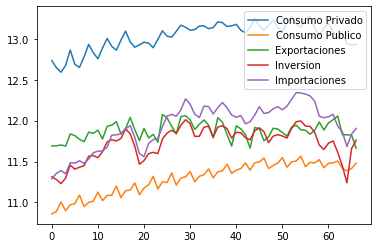

In [17]:
df_log.plot()

Aplico diferencial a cada variable para estacionarizar un poco

## Consumo Privado

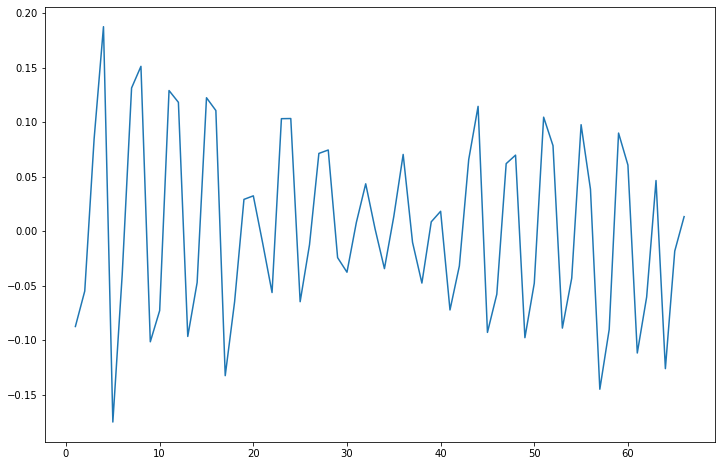

In [18]:
cpriv_diff1 = df_log["Consumo Privado"] - df_log["Consumo Privado"].shift(1)
cpriv_diff1.dropna().plot(figsize=(12,8))
plt.savefig("CPrivdiferenciada.png",format  ="png", dpi = 100, bbox_inches='tight')

In [19]:
#Chequeo estacionariedad

resultado = adfuller(cpriv_diff1.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

    #ES ESTACIONARIO

Estadistico:  -2.8681328200565313
p-valor:  0.04918119501913287
Valores críticos
1% -3.540522678829176
5% -2.9094272025108254
10% -2.5923136524453696


## Consumo Publico

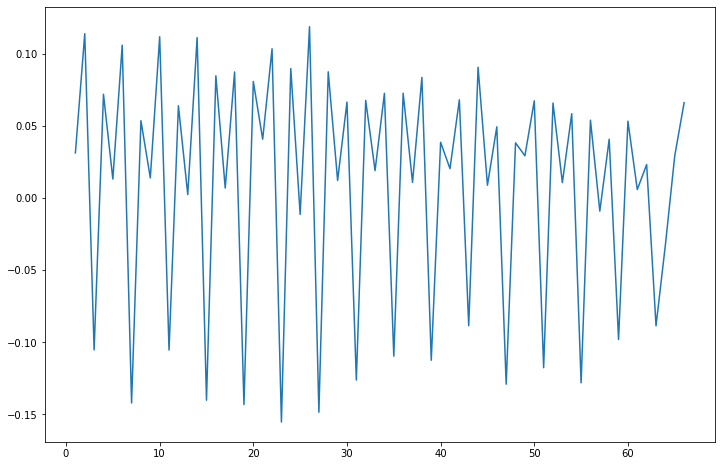

In [20]:
cpubl_diff1 = df_log["Consumo Publico"] - df_log["Consumo Publico"].shift(1)
cpubl_diff1.dropna().plot(figsize=(12,8))
plt.savefig("CPubldiferenciada.png",format  ="png", dpi = 100, bbox_inches='tight')

In [21]:
#Chequeo estacionariedad

resultado = adfuller(cpubl_diff1.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

    #NO ES ESTACIONARIO

Estadistico:  1.9269951828794714
p-valor:  0.99857023430298
Valores críticos
1% -3.560242358792829
5% -2.9178502070837
10% -2.5967964150943397


In [22]:
#Vamos a ver si agregando intercepto y tendencia  se corrige la estacionariedad

resultado = adfuller(cpubl_diff1.dropna(), maxlag = 12,regression = "ct") #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)
    
    #NO ES ESTACIONARIO

Estadistico:  -2.329144135990099
p-valor:  0.41790144800510987
Valores críticos
1% -4.123996164459387
5% -3.4891051933248596
10% -3.172910779449752


In [23]:
#Vamos a ver si agregando tendencia cuadratica se corrige

resultado = adfuller(cpubl_diff1.dropna(), maxlag = 12,regression = "ctt") 
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)
    
    #ES ESTACIONARIO

Estadistico:  -3.827259676827368
p-valor:  0.05071314724352537
Valores críticos
1% -4.583286370699906
5% -3.9385314920660957
10% -3.618255732707368


## Exportaciones

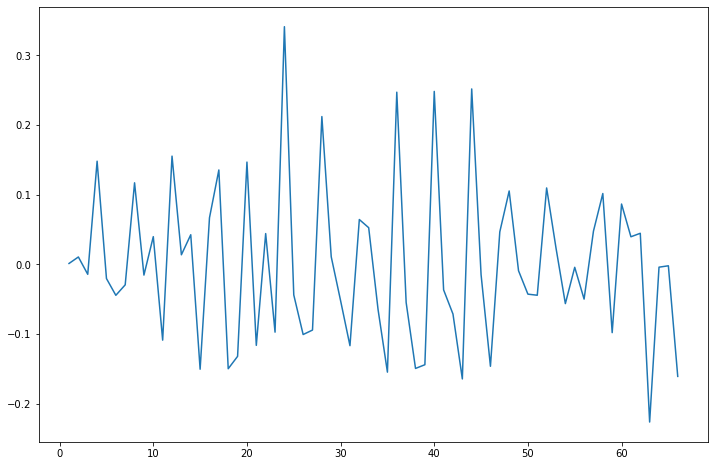

In [24]:
expo_diff1 = df_log["Exportaciones"] - df_log["Exportaciones"].shift(1)
expo_diff1.dropna().plot(figsize=(12,8))
plt.savefig("Expodiferenciada.png",format  ="png", dpi = 100, bbox_inches='tight')

In [25]:
#Chequeo estacionariedad

resultado = adfuller(expo_diff1.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)
    
#ES ESTACIONARIO    

Estadistico:  -3.4700209788976535
p-valor:  0.008791237346818954
Valores críticos
1% -3.540522678829176
5% -2.9094272025108254
10% -2.5923136524453696


## Inversion

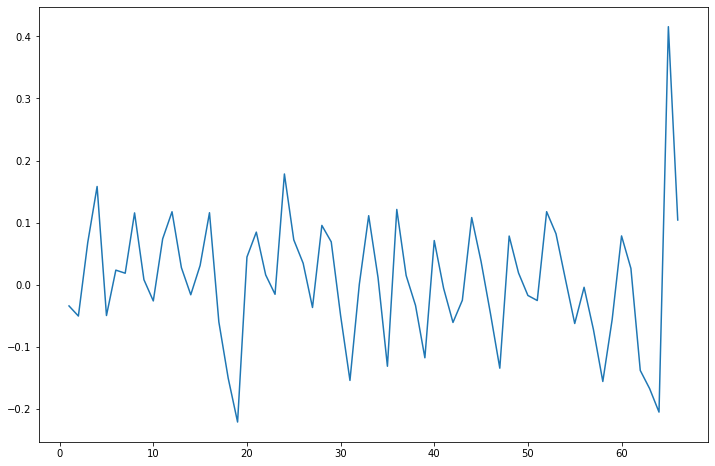

In [26]:
inv_diff1 = df_log["Inversion"] - df_log["Inversion"].shift(1)
inv_diff1.dropna().plot(figsize=(12,8))
plt.savefig("Invdiferenciada.png",format  ="png", dpi = 100, bbox_inches='tight')

In [27]:
#Chequeo estacionariedad

resultado = adfuller(inv_diff1.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

    #ES ESTACIONARIO

Estadistico:  -3.5868687467167604
p-valor:  0.006017088766708464
Valores críticos
1% -3.542412746661615
5% -2.910236235808284
10% -2.5927445767266866


## Importaciones

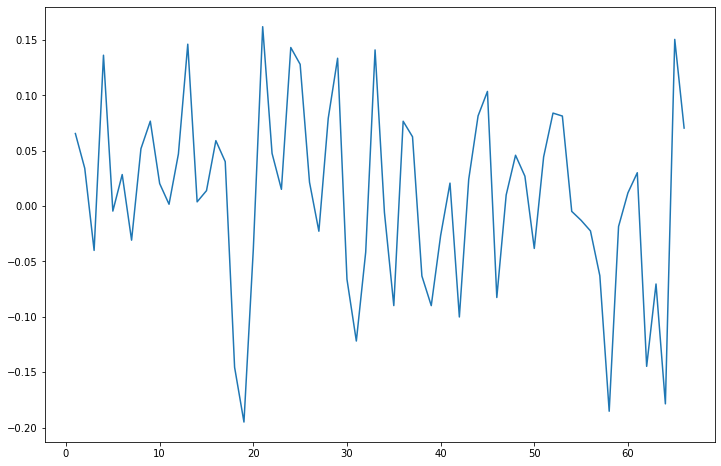

In [28]:
impo_diff1 = df_log["Importaciones"] - df_log["Importaciones"].shift(1)
impo_diff1.dropna().plot(figsize=(12,8))
plt.savefig("Impodiferenciada.png",format  ="png", dpi = 100, bbox_inches='tight')

In [29]:
#Chequeo estacionariedad

resultado = adfuller(impo_diff1.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)
    
    #ES ESTACIONARIO

Estadistico:  -3.958044522637911
p-valor:  0.0016468586197542427
Valores críticos
1% -3.542412746661615
5% -2.910236235808284
10% -2.5927445767266866


Todas las variables son estacionarias

In [30]:
# Dataframe con la diferencia del logaritmo de las variables

df_diff = pd.DataFrame()

df_diff["Consumo Privado"] = cpriv_diff1
df_diff["Consumo Publico"] = cpubl_diff1
df_diff["Exportaciones"] = expo_diff1
df_diff["Inversion"] = inv_diff1
df_diff["Importaciones"] = impo_diff1


In [31]:
# Reemplazo los nans por ceros

df_diff = df_diff.fillna(0)
df_diff

,Consumo Privado,Consumo Publico,Exportaciones,Inversion,Importaciones
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.087416,0.031177,0.001313,-0.034000,0.065432
2,-0.054924,0.113785,0.010636,-0.050275,0.034056
3,0.084626,-0.105296,-0.014254,0.068009,-0.040056
4,0.187566,0.071798,0.148138,0.158293,0.136143
...,...,...,...,...,...
62,-0.060398,0.023147,0.044642,-0.137869,-0.144725
63,0.046460,-0.088594,-0.226323,-0.167205,-0.070375
64,-0.126063,-0.032584,-0.004001,-0.204935,-0.178579
65,-0.018253,0.029170,-0.002014,0.415581,0.150436


## Una vez que las series de la svariables son estacionarias procedemos a estimar el modelo en conjunto con el PBI como variable endógena

In [32]:
# Seleccionamos nuestra edógena/producto

producto = df["Producto Interno Bruto"]

In [33]:
# Seleccionamos nuestras exógenas del dataframe con las diferencias

exog1 =df_diff.iloc[:,0:5].values

In [34]:
# Aplicamos logaritmo al producto

producto_log = np.log(producto)


#sabemos que hay que aplicarle diferencia
#esto se hace dentro del codigo del modelo 

In [35]:
mod1 = sm.tsa.statespace.SARIMAX(producto_log,
                                exog1,
                                order = (1,1,0),
                                trend=('ct'), #tendencia e intercepto de la serie
                            seasonal_order=(0, 0, 0, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod1.fit()

                                 SARIMAX Results                                  
Dep. Variable:     Producto Interno Bruto   No. Observations:                   67
Model:                   SARIMAX(1, 1, 0)   Log Likelihood                 133.252
Date:                    Sat, 10 Jul 2021   AIC                           -248.503
Time:                            12:06:04   BIC                           -228.934
Sample:                                 0   HQIC                          -240.782
                                     - 67                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0219      0.009      2.486      0.013       0.005       0.039
drift         -0.0005      0.000     -2.146      0.032      -0.001   -4.35e-05
x1             0.269

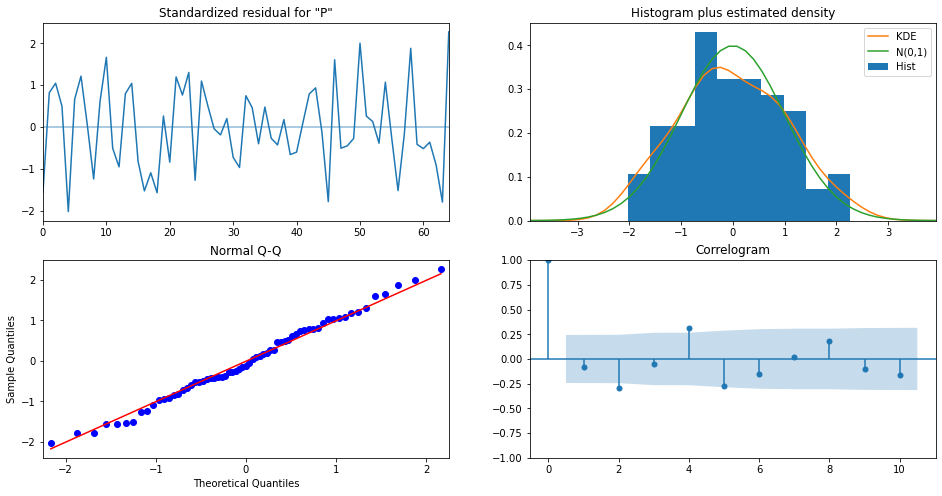

In [36]:
print(results1.summary())

results1.plot_diagnostics(figsize=(16, 8))
plt.savefig("Salida-PBI.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

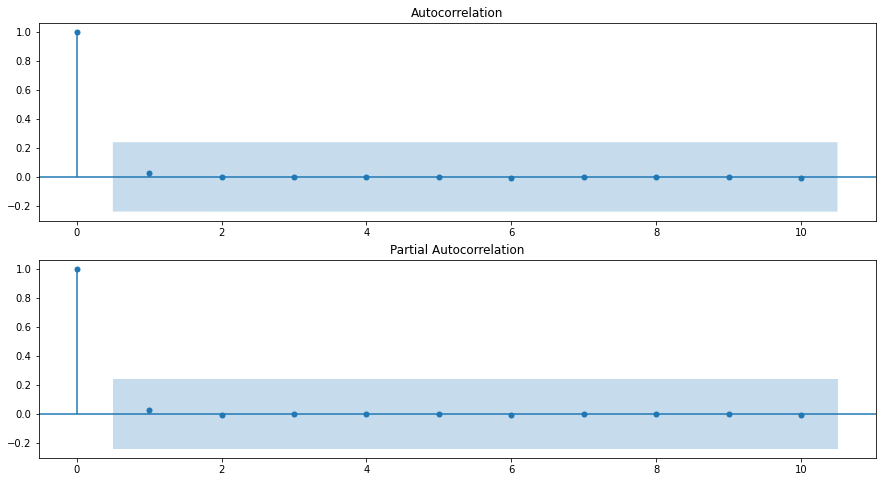

In [37]:
residuos1 = results1.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(residuos1, lags=10, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residuos1, lags=10, ax=ax[1])
plt.show()

In [38]:
mod = sm.tsa.statespace.SARIMAX(producto_log,
                                exog,
                                order = (1,1,0),
                                trend=('t'), #tendencia e intercepto de la serie
                            seasonal_order=(0, 0, 0, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

                                 SARIMAX Results                                  
Dep. Variable:     Producto Interno Bruto   No. Observations:                   67
Model:                   SARIMAX(1, 1, 0)   Log Likelihood                 161.745
Date:                    Sat, 10 Jul 2021   AIC                           -307.490
Time:                            12:06:06   BIC                           -290.095
Sample:                                 0   HQIC                          -300.627
                                     - 67                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       -7.87e-06   6.02e-05     -0.131      0.896      -0.000       0.000
x1             0.7175      0.061     11.755      0.000       0.598       0.837
x2             0.461

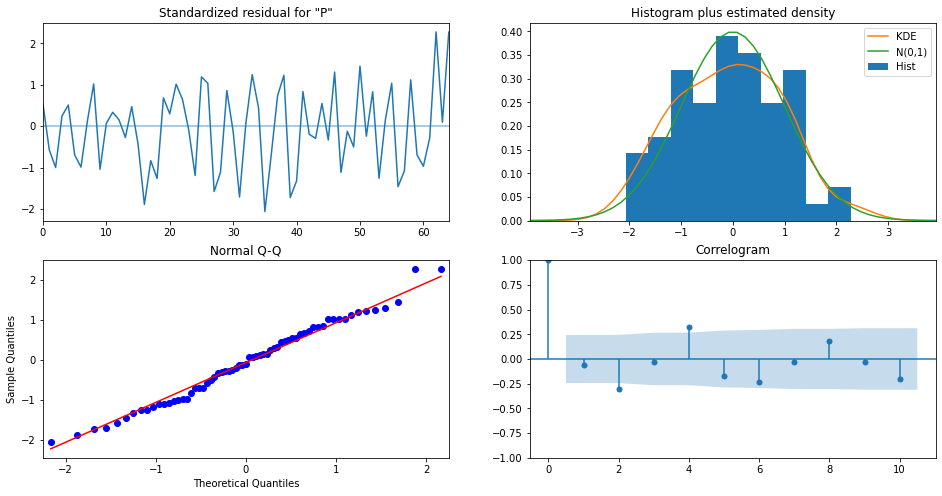

In [39]:
print(results.summary())

results.plot_diagnostics(figsize=(16, 8))
plt.savefig("Salida-PBI.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

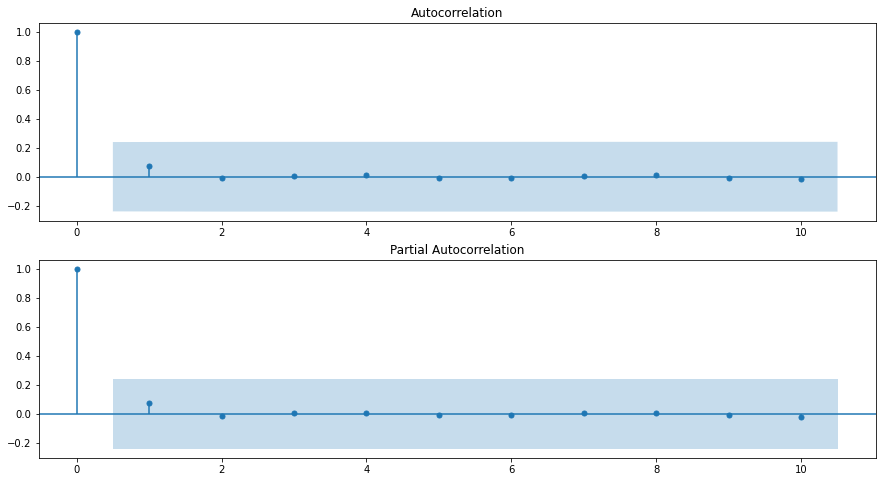

In [40]:
residuos = results.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(residuos, lags=10, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residuos, lags=10, ax=ax[1])
plt.show()

# Pronostico

In [41]:
#Valores del primer trimestre de 2021 publicados por el INDEC 

valores_2021 =np.array([[459514,90357,141011,129386,169793],[459514,90357,141011,129386,169793]])

#Predicción

pred = results.get_forecast(2, exog = np.log(valores_2021))
pred.predicted_mean

67    13.410691
68    13.411477
Name: predicted_mean, dtype: float64

In [42]:
print(pred.summary_frame())

Producto Interno Bruto       mean   mean_se  mean_ci_lower  mean_ci_upper
67                      13.410691  0.020095      13.371306      13.450076
68                      13.411477  0.026195      13.360136      13.462819


In [43]:
serie_predicha = results.get_prediction().predicted_mean

In [44]:
serie_predicha.append(pred.predicted_mean)[:-1]

0     14.941703
1     13.224074
2     13.080167
3     13.121050
4     13.293763
        ...    
63    13.360628
64    13.272023
65    13.327191
66    13.329412
67    13.410691
Name: predicted_mean, Length: 68, dtype: float64

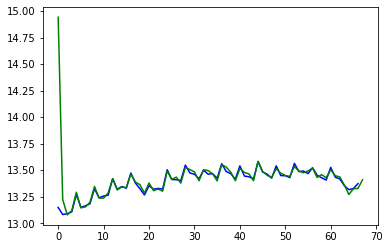

In [45]:
plt.plot(producto_log , color ="Blue") #Valor real
plt.plot(serie_predicha.append(pred.predicted_mean)[:-1], color ="Green") #Predicción
plt.savefig("Resultado DA-OA vs real.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

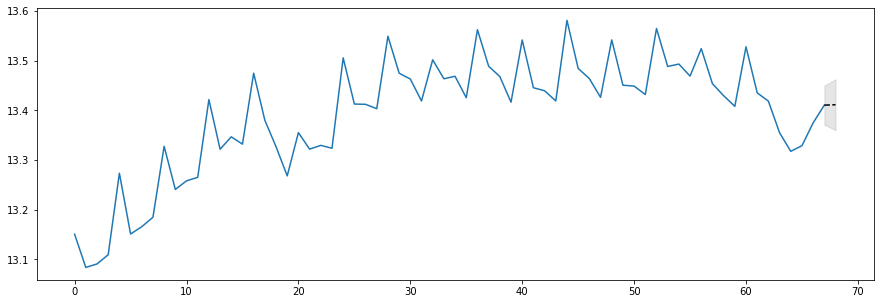

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
producto_log.append(pred.predicted_mean)[:-1].plot(ax=ax)

# Construct the forecasts
fcst = pred.summary_frame()
fcst['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcst.index, fcst['mean_ci_lower'], fcst['mean_ci_upper'], color='k', alpha=0.1);

In [47]:
#ERROR CUADRADO MEDIO
#diferencia absoluta promedio entre la serie real y la predicha
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(producto_log, serie_predicha))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.220


In [48]:
#MAE: ERROR ABSOLUTO MEDIO
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(producto_log, serie_predicha)
print('MAE: %.3f' % mae)

MAE: 0.045


In [49]:
#ERROR EN PORCENTAJE DE LA MEDIA DE LOS ERRORES
def SMAPE (forecast, actual):
    """Returns the Symmetric Mean Absolute Percentage Error between two Series"""
    masked_arr = ~((forecast==0)&(actual==0))
    diff = abs(forecast[masked_arr] - actual[masked_arr])
    avg = (abs(forecast[masked_arr]) + abs(actual[masked_arr]))/2
    print('SMAPE Error Score: ' + str(round(sum(diff/avg)/len(forecast) * 100, 2)) + ' %')
    return sum(diff/avg)/len(forecast) * 100



SMAPE(serie_predicha,producto_log)

SMAPE Error Score: 0.33 %


0.32694981796761735